In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['seaborn'])

import warnings
warnings.filterwarnings(action='ignore')

from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing

In [226]:
df_raw = pd.read_csv('./data/ether_df.csv')
df_raw.head()

,date,close,open,high,low,pc,volume
0,2021-12-27,4064.24,4062.02,4087.20,4049.39,0.07,252960.0
1,2021-12-26,4061.27,4093.38,4104.23,4005.38,-0.78,283580.0
2,2021-12-25,4093.14,4043.60,4136.03,4024.87,1.23,308530.0
3,2021-12-24,4043.39,4110.20,4133.77,4024.24,-1.62,353850.0
4,2021-12-23,4110.14,3979.57,4149.17,3895.89,3.28,573180.0


In [227]:
df_raw.set_index(['date'], inplace=True)
df_raw.sort_index(inplace=True)
df_raw.head()

,close,open,high,low,pc,volume
date,,,,,,
2016-03-10,11.75,11.20,11.85,11.07,4.91,0.0
2016-03-11,11.95,11.75,11.95,11.75,1.70,180.0
2016-03-12,12.92,11.95,13.45,11.95,8.12,830.0
2016-03-13,15.07,12.92,15.07,12.92,16.64,1300.0
2016-03-14,12.50,15.07,15.07,11.40,-17.05,92180.0


In [228]:
df = df_raw[['close']]
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2016-03-10', '2016-03-11', '2016-03-12', '2016-03-13',
               '2016-03-14', '2016-03-15', '2016-03-16', '2016-03-17',
               '2016-03-18', '2016-03-19',
               ...
               '2021-12-18', '2021-12-19', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27'],
              dtype='datetime64[ns]', name='date', length=2119, freq=None)

In [229]:
df.index.freq = 'D'
df.index

DatetimeIndex(['2016-03-10', '2016-03-11', '2016-03-12', '2016-03-13',
               '2016-03-14', '2016-03-15', '2016-03-16', '2016-03-17',
               '2016-03-18', '2016-03-19',
               ...
               '2021-12-18', '2021-12-19', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27'],
              dtype='datetime64[ns]', name='date', length=2119, freq='D')

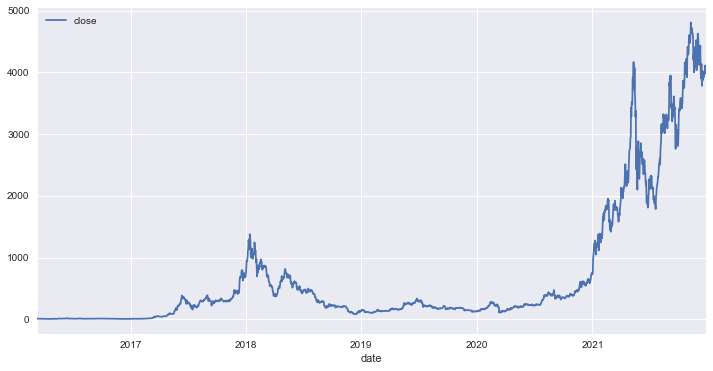

In [230]:
df.plot(figsize=(12,6));

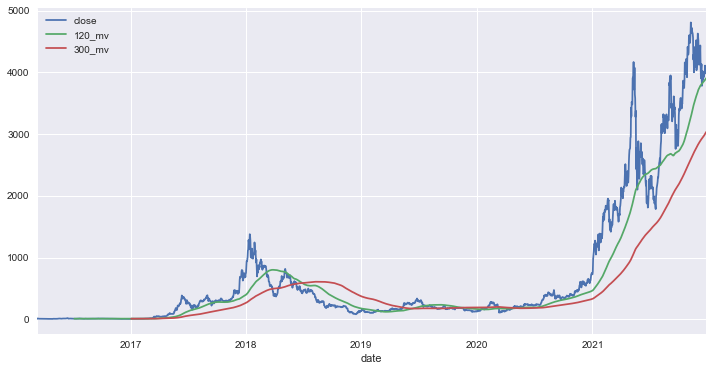

In [231]:
df['120_mv'] = df['close'].rolling(window=120).mean()
df['300_mv'] = df['close'].rolling(window=300).mean()
df.plot(figsize=(12,6));

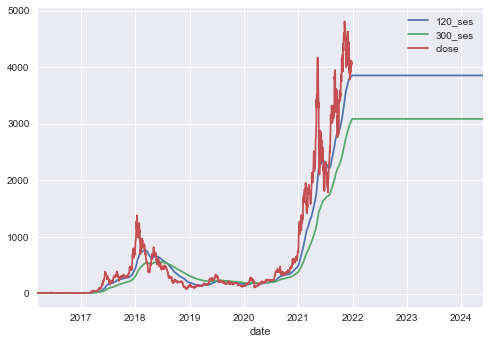

In [233]:
span = 120 # the period of moving average
ses = SimpleExpSmoothing(df['close'])
ses = ses.fit(smoothing_level=2/(span+1), optimized=False)
ses.predict(start=0, end=3000).plot(label='120_ses')
ses = ses.fittedvalues.shift(-1)
df['120_ses'] = ses

span = 300
ses = SimpleExpSmoothing(df['close'])
ses = ses.fit(smoothing_level=2/(span+1), optimized=False)
ses.predict(start=0, end=3000).plot(label='300_ses')
ses = ses.fittedvalues.shift(-1)
df['300_ses'] = ses

df['close'].plot(label='close')

plt.legend()

plt.show()

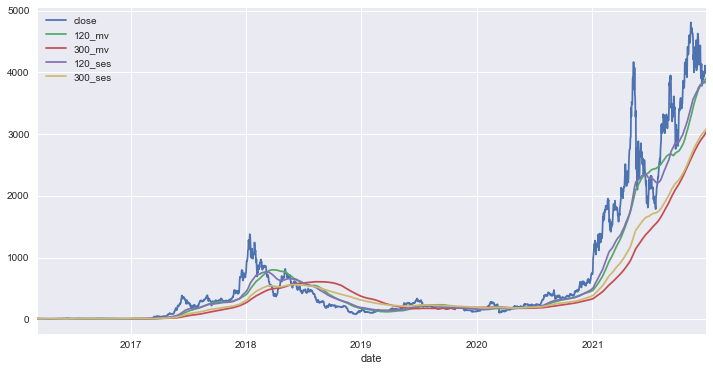

In [236]:
df.plot(figsize=(12,6));

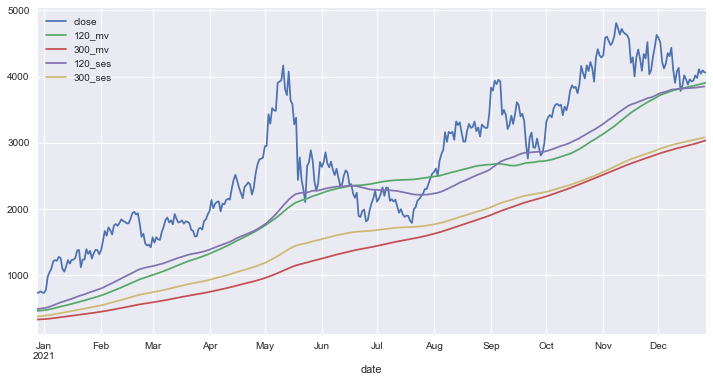

In [235]:
df.iloc[-365:].plot(figsize=(12,6));

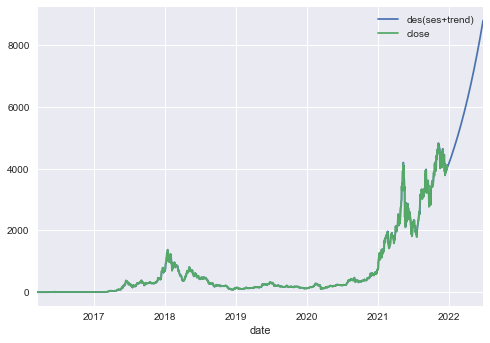

In [243]:
des = ExponentialSmoothing(df['close'], trend='mul')
des = des.fit()
des.predict(start=0, end=2300).plot(label='des(ses+trend)')
des = des.fittedvalues
df['des'] = des

df['close'].plot(label='close')

plt.legend()
plt.show()

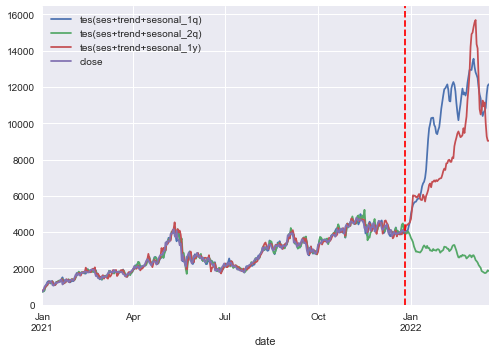

In [260]:
tes = ExponentialSmoothing(df['close'], trend='mul', seasonal='mul', seasonal_periods=90)
tes = tes.fit()
tes.predict(start=0, end=2200)["2021":].plot(label='tes(ses+trend+sesonal_1q)')
tes = tes.fittedvalues
df['1q_tes'] = tes

tes = ExponentialSmoothing(df['close'], trend='mul', seasonal='mul', seasonal_periods=180)
tes = tes.fit()
tes.predict(start=0, end=2200)["2021":].plot(label='tes(ses+trend+sesonal_2q)')
tes = tes.fittedvalues
df['2q_tes'] = tes

tes = ExponentialSmoothing(df['close'], trend='mul', seasonal='mul', seasonal_periods=365)
tes = tes.fit()
tes.predict(start=0, end=2200)["2021":].plot(label='tes(ses+trend+sesonal_1y)')
tes = tes.fittedvalues
df['1y_tes'] = tes

df['close']["2021":].plot(label='close')

plt.legend()
plt.axvline(df.index[2117], linestyle='--', color='r')
plt.show()

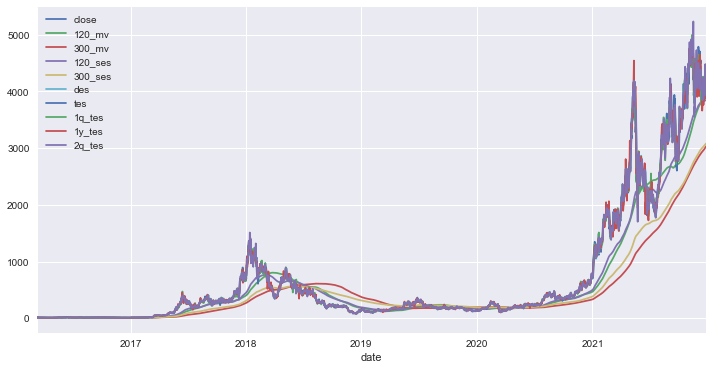

In [261]:
df.plot(figsize=(12,6));

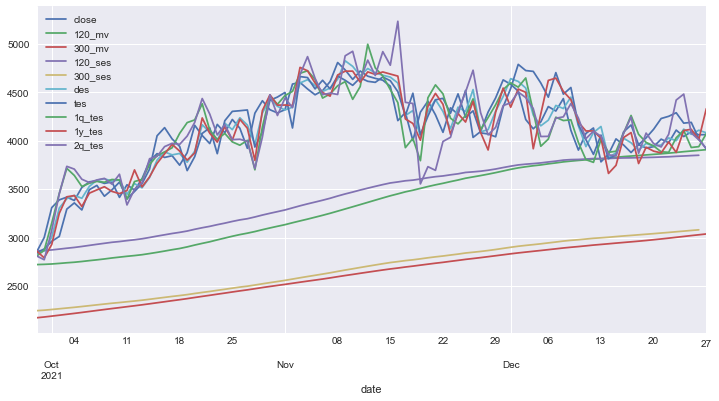

In [262]:
df.iloc[-90:].plot(figsize=(12,6));